In [9]:
import pandas as pd

# for drawing map
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
geo = pd.read_csv("DataSet/olist_geolocation_dataset.csv")

# Display the first few rows
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Brazil use 8 digit zip_code system. But, here 1 digit for major postal region, and 2-5 digit for sub_region, sector, sub_sector. But, upon checking the first few rows, I see only four digit in zip_code column. I check to see the distribution of length of zip_code in dataset.

In [11]:
geo["zip_code_length"] = geo["geolocation_zip_code_prefix"].astype(str).str.len()
geo["zip_code_length"].value_counts()

zip_code_length
5    754430
4    245733
Name: count, dtype: int64

In [12]:
# Load the Stack Overflow survey data
customers = pd.read_csv("DataSet/olist_customers_dataset.csv")

# Display the first few rows
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [36]:
customers[['customer_unique_id']].value_counts().sort_values()

customer_unique_id              
d63d0b04501d2e9583cfe64e6e9f7eda     1
03f3956529aac8ab54669986dbccdea5     1
03f3ed4259700c7e98700f786d99a1aa     1
03f55e00670ae82dab663c6706b5283a     1
03f57ac1bec6632e9d997677c133487c     1
                                    ..
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
3e43e6105506432c953e165fb2acf44c     9
8d50f5eadf50201ccdcedfb9e2ac8455    17
Name: count, Length: 96096, dtype: int64

In [13]:
cust_city = customers.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
cust_city.columns = ['city', 'unique_customer_count']

https://www.kaggle.com/datasets/thiagobodruk/brazil-geojson

### Sellers Dataset

In [14]:
sellers = pd.read_csv("DataSet/olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
sellers.shape

(3095, 4)

### Geolocation Dataset

In [16]:
geo.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
zip_code_length                  int64
dtype: object

In [17]:
geo.shape

(1000163, 6)

In [18]:
df = geo[['geolocation_zip_code_prefix']].drop_duplicates()
df.shape

(19015, 1)

In [19]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code_length
0,1037,-23.545621,-46.639292,sao paulo,SP,4
1,1046,-23.546081,-46.644820,sao paulo,SP,4
2,1046,-23.546129,-46.642951,sao paulo,SP,4
3,1041,-23.544392,-46.639499,sao paulo,SP,4
4,1035,-23.541578,-46.641607,sao paulo,SP,4


In [20]:
geo[['geolocation_zip_code_prefix']].value_counts()

geolocation_zip_code_prefix
24220                          1146
24230                          1102
38400                           965
35500                           907
11680                           879
                               ... 
20056                             1
76370                             1
63012                             1
76372                             1
32635                             1
Name: count, Length: 19015, dtype: int64

### Assumption 1
I found some zip_code prefix have a list of (lat, lng).
I am checking if I could create geojson file from that.

In [21]:
zip_code_24220 = geo[(geo['geolocation_zip_code_prefix'] == 24220)]
zip_code_24220.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code_length
470805,24220,-22.905817,-43.106989,niteroi,RJ,5
470811,24220,-22.902306,-43.112545,niteroi,RJ,5
470812,24220,-22.904567,-43.110491,niteroi,RJ,5
470820,24220,-22.902575,-43.109192,niteroi,RJ,5
470821,24220,-22.907500,-43.106170,niteroi,RJ,5


In [22]:
import json

# Convert to [Lon, Lat] format required by GeoJSON
geojson_coords = []
for row in zip_code_24220.iterrows():
    row_values = row[1] 
    location = [row_values['geolocation_lng'], row_values['geolocation_lat']]
    geojson_coords.append(location)

# Create the structure
geojson = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "id": 24220,
            "geometry": {
                "type": "LineString", # Use "Polygon" if it closes a loop
                "coordinates": geojson_coords
            },
            "properties": {}
        }
    ]
}

# Open 'data.json' in write mode and dump the data
try:
    with open("zip_code_24220.json", "w") as json_file:
        json.dump(geojson, json_file, indent=4)
    print("Successfully wrote data to data.json")
except IOError as e:
    print(f"Error writing to file: {e}")

Successfully wrote data to data.json


In [23]:
zip_code_24220_geo = gpd.read_file("zip_code_24220.json")
zip_code_24220_geo.head()
# zip_code_24220_geo.plot(edgecolor = "gray")

,geometry
0,"LINESTRING (-43.10699 -22.90582, -43.11254 -22..."


<Axes: >

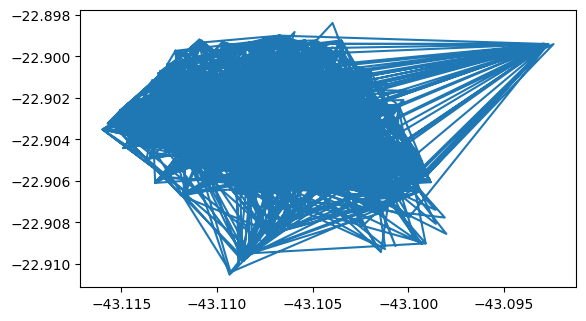

In [24]:
zip_code_24220_geo.plot()

### Finding 1
I can't create gejson file from geolocation dataset.
I will need to **remove duplicate** rows.

### Problem 1
When I tried to join sellers and geo, geo dataset do not have complete zip_code.
I'll try to fill in the dataset.

In [25]:
#convert sellers_geo to GeoDataFrame

# Create a geometry column from lat and lng
sellers_geo['geometry'] = gpd.points_from_xy(sellers_geo['lng'] ,sellers_geo['lat'] )

# Build a GeoDataFrame
sellers_geo = gpd.GeoDataFrame(sellers_geo, crs = 'epsg: 4236', geometry = sellers_geo.geometry)
sellers_geo.head()

NameError: name 'sellers_geo' is not defined

In [ ]:

# Spatial join of permits_geo and council_districts
permits_by_district = gpd.sjoin(permits_geo, council_districts,  predicate = "within")
print(permits_by_district.head(2))

# Create permit_counts
permit_counts = permits_by_district.groupby(['district']).size()
print(permit_counts)

In [26]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code_length
0,1037,-23.545621,-46.639292,sao paulo,SP,4
1,1046,-23.546081,-46.644820,sao paulo,SP,4
2,1046,-23.546129,-46.642951,sao paulo,SP,4
3,1041,-23.544392,-46.639499,sao paulo,SP,4
4,1035,-23.541578,-46.641607,sao paulo,SP,4


In [34]:
dddd = geo['geolocation_state'].value_counts().to_frame().reset_index()
dddd.sort_values('geolocation_state')

,geolocation_state,count
24,AC,1301
19,AL,4183
23,AM,2432
25,AP,853
6,BA,36045
12,CE,11674
10,DF,12986
8,ES,16748
7,GO,20139
15,MA,7853
